In [1]:
%matplotlib inline
from utils.paths import *

import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
print pruebas
print datasets
print dataframe_columns

['baseline', 'msda', 'gfk', 'pca', 'sda']
['amazon', 'twitter']
['Adaptacion', 'Tarea', 'Fuente', 'Objetivo', 'Baseline error', 'Transfer error', 'Transfer loss']


In [3]:
def get_scores_dataframe(dataset):
    df = None

    for prueba in pruebas:
        path = os.path.join(scores_path, prueba, dataset+'.csv')
                
        if os.path.exists(path):
            print path
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

# Gráficos del dataset Amazon

In [9]:
df_amazon = get_scores_dataframe(datasets[0])
df_amazon

scores/baseline/amazon.csv
scores/msda/amazon.csv
scores/gfk/amazon.csv
scores/sda/amazon.csv


Adaptacion,Baseline,GFK,SDA,mSDA
Tarea,,,,
b->d,0.057356,27.251800,3.00,6.001800
b->e,11.206835,29.061722,9.75,9.311722
b->k,10.753776,28.260006,13.75,15.510006
d->b,3.361320,23.008483,3.75,6.508483
d->e,9.061722,28.561722,12.25,6.061722
d->k,11.508394,30.510006,15.75,14.010006
e->b,9.357509,22.258483,11.00,12.508483
e->d,9.966178,25.251800,8.50,13.501800
e->k,6.510769,30.760006,14.00,8.510006


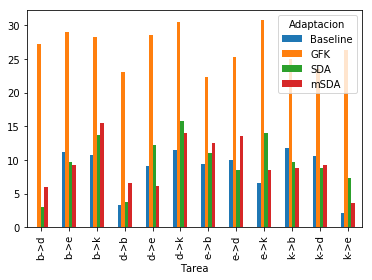

In [10]:
df_amazon.plot.bar()

# Gráficos del dataset Twitter

In [4]:
df_twitter = get_scores_dataframe(datasets[1])
df_twitter

scores/baseline/twitter.csv
scores/msda/twitter.csv
scores/gfk/twitter.csv


Adaptacion,Baseline,GFK,SDA
Tarea,,,
r->t,5.348675,42.379945,12.379945
t->r,0.958318,29.312639,4.312639


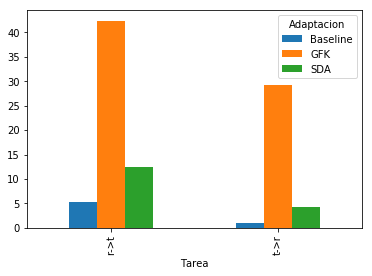

In [5]:
df_twitter.plot.bar()